<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


意外发现sklearn的KernelRigde

* 没有bias项，这意味所谓的系数都要受到L2正则化的影响。
* linear kernel没有常数项，$k(x,y) = x\cdot y$ 。
* 多项式核具有偏置项, $k(x,y) = (\gamma(x\cdot y) + c_0)^d$

因而如果要进行不惩罚偏置项的线性拟合，有两种方法

* 使用`sklearn.linear_model.Ridge`
* 使用`sklearn.kernel_ridge.KernelRidge(kernel="poly",degree=1, coef0=1E6)` 将`coef0`即($c_0$)设置的足够大，可以将正则化对偏置项的惩罚降到忽略不计。


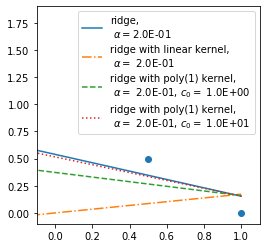

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
%matplotlib inline


X_train=np.array([[0.5], [1.0]])
y_train=np.array([0.5, 0])
X_plt=np.linspace(-1,1,10)

alpha=0.2
ridge = KernelRidge(kernel="poly", alpha=alpha, coef0=1E0, gamma=1, degree=1)
ridge.fit(X_train, y_train)
yhat = ridge.predict(X_plt.reshape(-1,1))

ridge = KernelRidge( kernel="linear", alpha=alpha, coef0=1E10)
ridge.fit(X_train, y_train)
yhat3 = ridge.predict(X_plt.reshape(-1,1))

ridge = KernelRidge(kernel="poly", alpha=alpha, coef0=1E1, gamma=1, degree=1)
ridge.fit(X_train, y_train)
yhat1 = ridge.predict(X_plt.reshape(-1,1))

ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)
yhat2 = ridge2.predict(X_plt.reshape(-1,1))

plt.figure(figsize=(4,4))
X_plt=np.linspace(-1,1,10)
plt.scatter(X_train, y_train)
plt.plot(X_plt, yhat2, label="ridge,\n" + r" $\alpha=$%.1E"%alpha)
plt.plot(X_plt, yhat3 , label="ridge with linear kernel,\n" + r" $\alpha=$ %.1E"%(alpha), linestyle="-.")
plt.plot(X_plt, yhat , label="ridge with poly(1) kernel,\n" + r" $\alpha=$ %.1E, $c_0 =$ %.1E"%(alpha, 1 ), linestyle="--")
plt.plot(X_plt, yhat1, label="ridge with poly(1) kernel,\n" + r" $\alpha=$ %.1E, $c_0 =$ %.1E"%(alpha, 10), linestyle=":")
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.9))
plt.legend()
plt.show()